# Получение текстовых данных.

**Получение текстовых данных**

Цель  получить текстовый набор данных для последующего анализа. \
Используемые библиотеки: \
requests (для отправки HTTP-запросов) и BeautifulSoup (для парсинга HTML)

In [ ]:
# импорт библиотек
import requests
import time
import csv
from bs4 import BeautifulSoup

In [ ]:
url = 'https://sprosidoktora.ru/comments/' # url сайта для парсинга
r = requests.get(url) # отправка GET-запроса для получения страницы
with open('comment_page.html', 'wb') as output_file: # сохранение полученной страницы
  output_file.write(r.text.encode())

r.text # страница сайта

'<!DOCTYPE html>\r\n<html lang="ru" xml:lang="ru" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">\r\n    <head>\r\n        <meta charset="utf-8" />\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n        <meta name="viewport" content="width=device-width, initial-scale=1" />\r\n\r\n        \r\n    <meta name=keywords content="медицинские учреждения, медицинские центры, медцентры, поликлиники, аптеки, госпиталь, каталог учреждений, каталог больниц, больницы, куда обратиться, лучшие аптеки" />\r\n    <meta name=description content="Каталог медицинских учреждений и каталог медицинских центров -  самый полный и постоянно обновляемый медицинский каталог." />\r\n\r\n\r\n        <title>\r\n            Отзывы о медучреждениях\r\n        </title>\r\n\r\n        \r\n        \r\n        <base href="//sprosidoktora.ru" />\r\n        <link rel="icon" href="/static/images/favicon.ico" type="image/x-icon" />\r\n\r\n        <style type="text/css">\r\n        

Информация о блоке

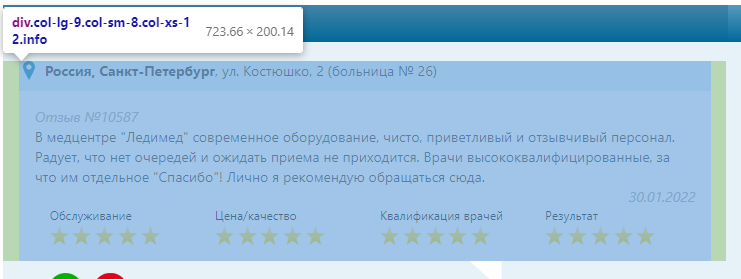

In [ ]:
s = requests.Session() # создание сессии  
url = 'https://sprosidoktora.ru/comments/'
request = s.get(url) # получение страницы 

soup = BeautifulSoup(request.text, features="lxml") # создание объекта BeautifulSoup для работы с DOM моделью
location_blocks = soup.findAll('div', {'class': 'col-lg-9 col-sm-8 col-xs-12 info'}) # получение всех div с классом 'col-lg-9 col-sm-8 col-xs-12 info', который содержит всю необходимую информацию

print(location_blocks)

[<div class="col-lg-9 col-sm-8 col-xs-12 info">
<div>
<div class="icon icon-location"></div>
<p><span>Россия, Санкт-Петербург</span>, ул. Костюшко, 2 (больница № 26)</p>
</div>
<div class="dialog">
<span class="id">Отзыв №10614</span>
<p>Для меня в выборе клиники главным является  комфорт, чистота, вежливое отношение и конечно компетенция врачей. Всё это я нашла в  центре Леди -Мед, уютная обстановка, душевность сотрудников. Принимала меня врач Бабий Ольга Владимировна, хочу сказать ей спасибо. Всё внимательно выслушала, безболезненно провела анализы. Чувствуется профессионализм и опыт! В общем остались только хорошие впечатления. Спасибо!</p>
<span class="date">04.06.2022</span>
<div class="row">
<div class="col-xs-12 col-md-6 col-lg-3" data-read-only="1" data-target="raty" data-value="5.0"><span>Обслуживание</span></div>
<div class="col-xs-12 col-md-6 col-lg-3" data-read-only="1" data-target="raty" data-value="5.0"><span>Цена/качество</span></div>
<div class="col-xs-12 col-md-6 col-l

In [ ]:
# пример получения информации об адрессе организации 
# используем объект полученный на предыдущем шаге
location= []
for block in location_blocks:
    location.append(block.find('div').find('p').text) # выбираем первый div с тегом <p>

print(location) # список всех адресов  

['Россия, Санкт-Петербург, ул. Костюшко, 2 (больница № 26)', 'Россия, Москва, ул. Таежная д.1', 'Россия, Санкт-Петербург, ул. Костюшко, 2 (больница № 26)', 'Россия, Москва, ул. Таежная д.1', 'Россия, Санкт-Петербург, ул. Костюшко, 2 (больница № 26)', 'Россия, Санкт-Петербург, ул. Костюшко, 2 (больница № 26)', 'Беларусь, Минск', 'Россия, Воронеж, улица 60 Армии, 22,', 'Россия, Санкт-Петербург, ул. Костюшко, 2 (больница № 26)', 'Россия, Санкт-Петербург, ул. Костюшко, 2 (больница № 26)', 'Россия, Москва, ул. Таежная д.1']


In [ ]:
# получение блока с комментраием
comments_items = soup.findAll('div', {'class': 'dialog'})
comments_items[0] # вывод первого блока

<div class="dialog">
<span class="id">Отзыв №10614</span>
<p>Для меня в выборе клиники главным является  комфорт, чистота, вежливое отношение и конечно компетенция врачей. Всё это я нашла в  центре Леди -Мед, уютная обстановка, душевность сотрудников. Принимала меня врач Бабий Ольга Владимировна, хочу сказать ей спасибо. Всё внимательно выслушала, безболезненно провела анализы. Чувствуется профессионализм и опыт! В общем остались только хорошие впечатления. Спасибо!</p>
<span class="date">04.06.2022</span>
<div class="row">
<div class="col-xs-12 col-md-6 col-lg-3" data-read-only="1" data-target="raty" data-value="5.0"><span>Обслуживание</span></div>
<div class="col-xs-12 col-md-6 col-lg-3" data-read-only="1" data-target="raty" data-value="5.0"><span>Цена/качество</span></div>
<div class="col-xs-12 col-md-6 col-lg-3" data-read-only="1" data-target="raty" data-value="5.0"><span>Квалификация врачей</span></div>
<div class="col-xs-12 col-md-6 col-lg-3" data-read-only="1" data-target="raty"

In [ ]:
# сбор комментариев и оценки 
comments = []
sentiments = []
  
for items in comments_items:
    comment = items.find('p').text               
    comments.append(comment)
    
    sentiment = items.find('span', text='Обслуживание').parent
    sentiments.append(float(sentiment['data-value']))

In [ ]:
sentiments # список оценок на странице

[5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

In [ ]:
comments # список комментариев на странице

['Для меня в\xa0выборе клиники главным является  комфорт, чистота, вежливое отношение и\xa0конечно компетенция врачей. Всё это я\xa0нашла в\xa0 центре Леди -Мед, уютная обстановка, душевность сотрудников. Принимала меня врач Бабий Ольга Владимировна, хочу сказать ей\xa0спасибо. Всё внимательно выслушала, безболезненно провела анализы. Чувствуется профессионализм и\xa0опыт! В\xa0общем остались только хорошие впечатления. Спасибо!',
 'Очень ответственные врачи работают в этой клинике. Всегда готовы прийти на помощь.',
 'Огромное спасибо медперсоналу Леди-Мед за качественное обслуживание. Все большие молодцы, прям котоки. вежливые и внимательные. Все деликатные проблемы решаются быстро, профессионально и\xa0конфиденциально.\r\n',
 'Легла в клинику «Угодие» - лечилась от наркотиков. С тех пор 2 года чиста.',
 'Огромное спасибо  Нугзару Семёновичу. за квалифицированную и эффективную помощь в борьбе с давнишними проблемами.  Уже потеряла надежду на выздоровление, а оказывается есть специалис

In [ ]:
# собираем все вместе
s = requests.Session() 

titles = ['comment', 'sentiment','price_quality', 'medical_quility', 'result','location' ] # данные которые будем сохранять

with open('harvest_data.csv', mode="w", encoding='utf-8') as f: # создаем файл для хранения данных
     writer  = csv.writer(f)
     writer.writerow(titles)

def load_comment_page(page, session): # функция обхода страниц, принимает объект для создания запросов и номер страницы    
    url = 'https://sprosidoktora.ru/comments/'+str(page)    
    request = session.get(url)    
    return request.text

def contain_comment_data(text): # функция для получения данных со страницы, принмает на вход HTML

    soup = BeautifulSoup(text, features="lxml") # создаем объект BeautifulSoup для взаимодействия с DOM-моделью
    location_blocks = soup.findAll('div', {'class': 'col-lg-9 col-sm-8 col-xs-12 info'}) # получение всех div с классом 'col-lg-9 col-sm-8 col-xs-12 info', который содержит всю необходимую информацию
    
    location= [] # собираем информацию об адресе 
    for block in location_blocks:
        location.append(block.find('div').find('p').text)
    
    comments_items = soup.findAll('div', {'class': 'dialog'}) # получаем все div содержащие инофрмацию об отзыве
    
    it = 0
    for items in comments_items: # делаем обход всех блоков и собираем необходимую информацию
        
        data = [] # в этом списке будем хранить информацию
        
        comment = items.find('p').text # выбираем тег содержащий комментарий              
        data.append(comment)
        comments.append(comment)
        
        sentiment = items.find('span', text='Обслуживание').parent # выбираем тег содержащий оценку Обслуживание 
        if sentiment['data-value']: # делаем проверку на наличие оценки
            data.append(float(sentiment['data-value']))
        else:
            data.append(-1)        
        
        price_quality = items.find('span',text='Цена/качество').parent # выбираем тег содержащий оценку Цена/качество 
        if price_quality['data-value']: # делаем проверку на наличие оценки
            data.append(float(price_quality['data-value']))
        else:
            data.append(-1)
                
        medical_quality =  items.find('span',text='Квалификация врачей').parent # выбираем тег содержащий оценку Квалификация врачей 
        if medical_quality['data-value']: # делаем проверку на наличие оценки
            data.append(float(medical_quality['data-value']))
        else:
            data.append(-1)
                
        result =items.find('span', text='Результат').parent # выбираем тег содержащий оценку Результат 
        if result['data-value']: # делаем проверку на наличие оценки
            data.append(float(result['data-value']))
        else:
            data.append(-1)
                
        if location[it]: # добавляем информацию об адресе 
            data.append(location[it])
        else:
            data.append(-1)
        
        it+=1
        with open('harvest_data.csv',  mode="a", encoding='utf-8') as f: # записываем строчку с данными в файл
            writer = csv.writer(f)
            writer.writerow(data)
    
    return comments_items


page = 0
while True: # цикл обхода страниц для сбора информации
    print(page)
    time.sleep(0.1)
    page_content = load_comment_page(page, s)    
    if contain_comment_data(page_content):        
        page += 11 # переходим по страницам и видим в адресной строке измение на 11
    else:
       break

print("data saved")

0
11
22
33
44
55
66
77
88
99
110
121
132
143
154
165
176
187
198
209
220
231
242
253
264
275
286
297
308
319
330
341
352
363
374
385
396
407
418
429
440
451
462
473
484
495
506
517
528
539
550
561
572
583
594
605
616
627
638
649
660
671
682
693
704
715
726
737
748
759
770
781
792
803
814
825
836
847
858
869
880
891
902
913
924
935
946
957
968
979
990
1001
1012
1023


**Задание:** \
Для сайта по варианту получить набор данных